<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [17]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [18]:
# Cargar datos
path = 'C:/Users/XboxL/Documents/01 - Maestria En Analitica de Datos/02 - Procesamiento de Lenguaje Natural (NLP) - Clase/Recursos/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [19]:
columnasEliminar = ["review_id","product_id","reviewer_id","stars","review_title","language","product_category"]
data = data.drop(columnasEliminar,axis=1)
data.head()

,review_body
0,"Buen. Buena calidad, y buena presentación."
1,"Un producto a perfecto, para salir de casa con..."
2,No funciona con Nintendo Switch. No hay forma ...
3,"Recomendado, los utilizo para pc y no me dan n..."
4,El cable funciona bien podria ser un poco mas ...


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [20]:
def pre_procesado(texto):
    from nltk.corpus import stopwords
    stopwords_sp = stopwords.words('spanish')

    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto


In [21]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [25]:
tfidf_matrix


,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ks = []
k_inertias = []

for k in range(1,25):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

D:\Python\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [35]:
list(zip(ks,k_inertias))

[(1, 987.4947060744681),
 (2, 980.4773199340872),
 (3, 974.991047121421),
 (4, 969.4970903998502),
 (5, 966.3032967062146),
 (6, 962.0264252309379),
 (7, 958.8825408347989),
 (8, 952.9331879203736),
 (9, 950.4487982754683),
 (10, 948.3148630552565),
 (11, 945.4275594745607),
 (12, 944.5833374439311),
 (13, 942.0654919643678),
 (14, 940.8462504030448),
 (15, 939.2800134612831),
 (16, 933.8662798429515),
 (17, 933.1762997072641),
 (18, 932.4619208582614),
 (19, 927.2293041809795),
 (20, 927.0636607859659),
 (21, 926.18549846474),
 (22, 925.562851965151),
 (23, 924.0293535384297),
 (24, 922.5832368917919)]

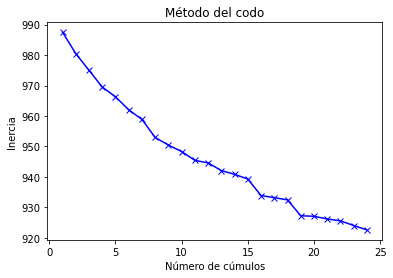

In [36]:
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

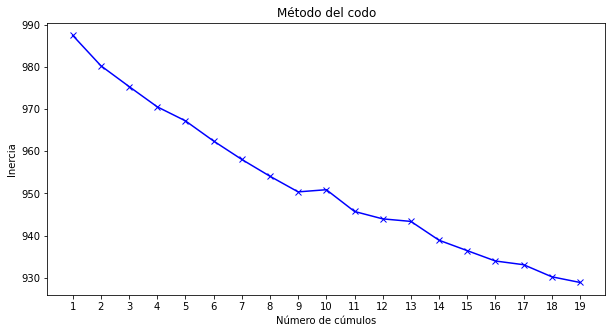

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [37]:
k = 19
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=19)

In [38]:
data['cluster'] = model.labels_
data

,review_body,cluster
0,"Buen. Buena calidad, y buena presentación.",4
1,"Un producto a perfecto, para salir de casa con...",3
2,No funciona con Nintendo Switch. No hay forma ...,7
3,"Recomendado, los utilizo para pc y no me dan n...",1
4,El cable funciona bien podria ser un poco mas ...,1
...,...,...
995,En la foto parece que la cadena sea más gruesa...,16
996,"Bien por su precio, la cadena demasiado fina.",16
997,Muy bien!! Ahora tengo organizados los pendien...,1
998,"Las tapas para los joystics no están nada mal,...",7


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [42]:
data['cluster'] = model.labels_
data

,review_body,cluster
0,"Buen. Buena calidad, y buena presentación.",4
1,"Un producto a perfecto, para salir de casa con...",3
2,No funciona con Nintendo Switch. No hay forma ...,7
3,"Recomendado, los utilizo para pc y no me dan n...",1
4,El cable funciona bien podria ser un poco mas ...,1
...,...,...
995,En la foto parece que la cadena sea más gruesa...,16
996,"Bien por su precio, la cadena demasiado fina.",16
997,Muy bien!! Ahora tengo organizados los pendien...,1
998,"Las tapas para los joystics no están nada mal,...",7


CLUSTERS:

Cluster 0:
COUNT  52 comments (5.20% of the data)
TERMS  perfecto llegó tiempo gracias sido rápido justo juego tamaño producto recomendable rapido poner funciona igual funcionar buen mano castellano encanta 
REPRESENTATIVE COMMENTS
* Todo en perfecto estado
* Perfecto y en tiempo
* Llegó a tiempo y en perfecto estado


Cluster 1:
COUNT  211 comments (21.10% of the data)
TERMS  bien juego bastante aunque cadena funciona si viene español caja dos jugar solo producto mas regalo precio ps así imagen 
REPRESENTATIVE COMMENTS
* Está bien por su precio
* Por el precio que tiene está muy bien
* Esta bien,fue un regalo


Cluster 2:
COUNT  551 comments (55.10% of the data)
TERMS  producto llegado si buen regalo día mas bonitos foto mando bonita llego pulsera solo plata llegó pequeños tiempo mal amazon 
REPRESENTATIVE COMMENTS
* El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta. Vale la pena.
* No ha llegado el collar . La

###  `[BONUS: 3 pts]` Visualización usando PCA

In [46]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

In [58]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'green',
             3:'#636EFA',
             4:'#EF553B',
             5:'#00CC96',
             6:'#AB63FA',
             7:'#FFA15A',
             8:'#19D3F3',
             9:'#FF6692',
             10:'#B6E880',
             11:'#FF97FF',
             12:'#FECB52',
             13:'#CCFFCC',
             14:'#C0C0C0',
             15:'#00FFB3',
             16: 'red'}

result['colores'] = result['cluster'].map(colorsIdx)


In [59]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Comparación

### `[BONUS 20 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [ ]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?